<a href="https://colab.research.google.com/github/snmkrhn/EEG-Sinyalleri-ile-Psikiyatrik-Bozukluklar-n-Tespiti/blob/main/EEG_Sinyalleri_ile_Psikiyatrik_Bozukluklar%C4%B1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# kaggle.json dosyasını yükle
files.upload()


Saving kaggle (4).json to kaggle (4).json


{'kaggle (4).json': b'{"username":"sinemkarahan","key":"7bd19291afde2ca955fb013ab63ed999"}'}

In [ ]:
!ls


'kaggle (4).json'   sample_data


In [ ]:
!mv "kaggle (4).json" kaggle.json


In [ ]:
import os
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d shashwatwork/eeg-psychiatric-disorders-dataset --force



Dataset URL: https://www.kaggle.com/datasets/shashwatwork/eeg-psychiatric-disorders-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/4.72M [00:00<?, ?B/s]
100% 4.72M/4.72M [00:00<00:00, 434MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("eeg-psychiatric-disorders-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("eeg_data")


In [ ]:
!ls eeg_data


EEG.machinelearing_data_BRMH.csv


In [ ]:
!ls /content/


eeg_data  eeg-psychiatric-disorders-dataset.zip  kaggle.json  sample_data


In [ ]:
import zipfile

# Zip dosyasını çıkartalım
with zipfile.ZipFile("eeg-psychiatric-disorders-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/eeg_data")

# Çıkartma işleminden sonra dosya listesini kontrol edelim
!ls /content/eeg_data


EEG.machinelearing_data_BRMH.csv


In [ ]:
import pandas as pd

# CSV dosyasını oku
df = pd.read_csv('/content/eeg_data/EEG.machinelearing_data_BRMH.csv')

# İlk birkaç satırı göster
df.head()


,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [ ]:
!pip install mne


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 53.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne
from math import ceil

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


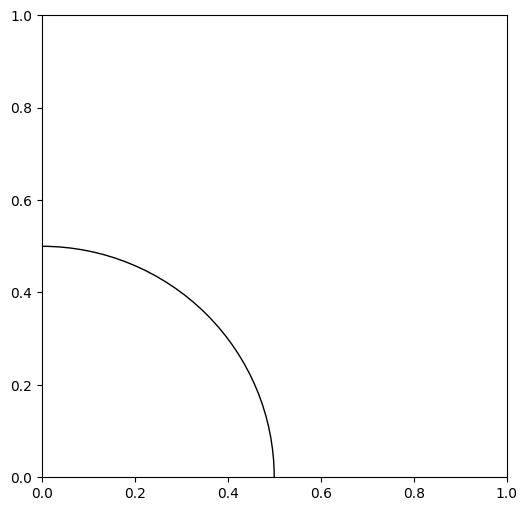

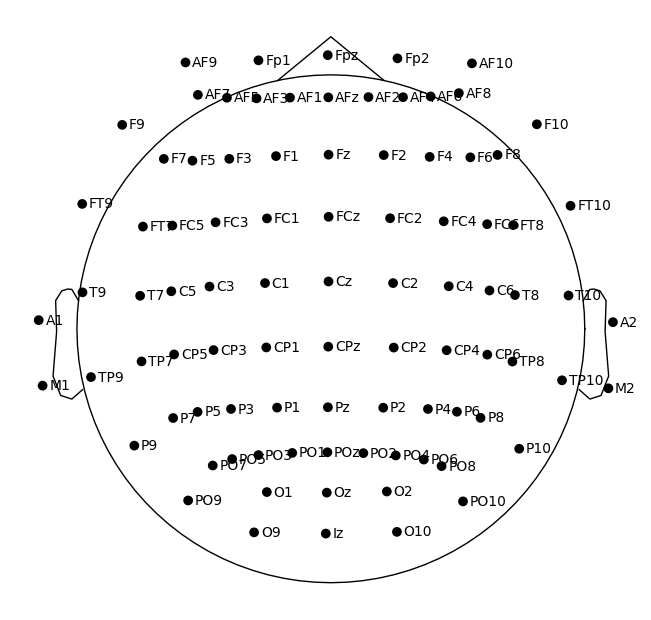

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# 10-20 sistemine göre EEG elektrot yerleşimi
montage = mne.channels.make_standard_montage("standard_1020")

# Elektrot noktalarını al
ch_positions = montage.get_positions()['ch_pos']

# X ve Y koordinatlarını al
xy_coords = np.array([ch_positions[ch][:2] for ch in montage.ch_names])

# Elektrot isimlerini al
labels = montage.ch_names

# Renkleri belirle (frontal, parietal, occipital gibi farklı bölgeler için)
colors = {
    'F': 'lightblue',   # Frontal lob
    'C': 'yellow',      # Central bölge
    'P': 'lightgreen',  # Parietal lob
    'O': 'lightcoral',  # Oksipital lob
    'T': 'lightgreen',  # Temporal lob
}

fig, ax = plt.subplots(figsize=(6, 6))

# Beyin şekli çizimi
circle = plt.Circle((0, 0), 0.5, color='black', fill=False)
ax.add_artist(circle)

import mne
import matplotlib.pyplot as plt

# 10-20 sistemine göre standart elektrot yerleşimi
montage = mne.channels.make_standard_montage("standard_1020")

# Elektrotları göster
fig = montage.plot(kind='topomap', show_names=True)

plt.show()





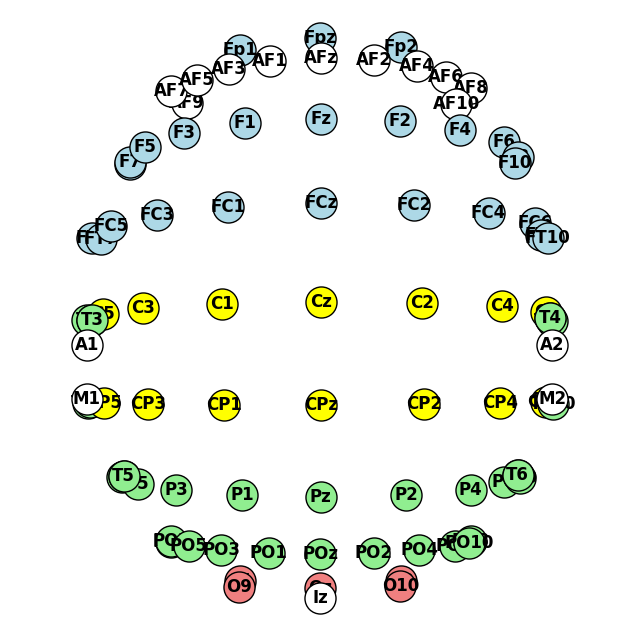

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# 10-20 sistemine göre EEG elektrot yerleşimi
montage = mne.channels.make_standard_montage("standard_1020")

# Elektrot noktalarını al
ch_positions = montage.get_positions()['ch_pos']

# X ve Y koordinatlarını al
xy_coords = np.array([ch_positions[ch][:2] for ch in montage.ch_names])

# Elektrot isimlerini al
labels = montage.ch_names

# Renkleri belirle (frontal, parietal, occipital gibi farklı bölgeler için)
colors = {
    'F': 'lightblue',   # Frontal lob
    'C': 'yellow',      # Central bölge
    'P': 'lightgreen',  # Parietal lob
    'O': 'lightcoral',  # Oksipital lob
    'T': 'lightgreen',  # Temporal lob
}

fig, ax = plt.subplots(figsize=(8, 8))  # Grafik boyutunu büyüttüm

# Beyin şekli çizimi
circle = plt.Circle((0, 0), 0.5, color='black', fill=False)
ax.add_artist(circle)

# Elektrot noktalarını çiz
for i, (x, y) in enumerate(xy_coords):
    region = labels[i][0]  # İlk harf ile bölge belirle
    color = colors.get(region, 'white')  # Bölgeye göre renk seç

    # Elektrot noktası çiz
    ax.scatter(x, y, color=color, edgecolors='black', s=500, zorder=3)

    # Elektrot ismini yaz
    ax.text(x, y, labels[i], fontsize=12, ha='center', va='center', fontweight='bold')

ax.set_xlim(-0.6, 0.6)
ax.set_ylim(-0.6, 0.6)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# 🔥 Eksenleri eşit oranda ölçeklendir
plt.axis("equal")

plt.show()


In [ ]:
chs = {'FP1': [-0.03, 0.08],
       'FP2': [0.03, 0.08],
       'F7': [-0.073, 0.047],
       'F3': [-0.04, 0.041],
       'Fz': [0, 0.038],
       'F4': [0.04, 0.041],
       'F8': [0.073, 0.047],
       'T3': [-0.085, 0],
       'C3': [-0.045, 0],
       'Cz': [0, 0],
       'C4': [0.045, 0],
       'T4': [0.085, 0],
       'T5': [-0.073, -0.047],
       'P3': [-0.04, -0.041],
       'Pz': [0, -0.038],
       'P4': [0.04, -0.041],
       'T6': [0.07, -0.047],
       'O1': [-0.03, -0.08],
       'O2': [0.03, -0.08]}
channels = pd.DataFrame(chs).transpose()
channels

,0,1
FP1,-0.030,0.080
FP2,0.030,0.080
F7,-0.073,0.047
F3,-0.040,0.041
Fz,0.000,0.038
F4,0.040,0.041
F8,0.073,0.047
T3,-0.085,0.000
C3,-0.045,0.000
Cz,0.000,0.000


In [ ]:
for key in chs.keys():
    chs[key]+=[0]
chs

{'FP1': [-0.03, 0.08, 0],
 'FP2': [0.03, 0.08, 0],
 'F7': [-0.073, 0.047, 0],
 'F3': [-0.04, 0.041, 0],
 'Fz': [0, 0.038, 0],
 'F4': [0.04, 0.041, 0],
 'F8': [0.073, 0.047, 0],
 'T3': [-0.085, 0, 0],
 'C3': [-0.045, 0, 0],
 'Cz': [0, 0, 0],
 'C4': [0.045, 0, 0],
 'T4': [0.085, 0, 0],
 'T5': [-0.073, -0.047, 0],
 'P3': [-0.04, -0.041, 0],
 'Pz': [0, -0.038, 0],
 'P4': [0.04, -0.041, 0],
 'T6': [0.07, -0.047, 0],
 'O1': [-0.03, -0.08, 0],
 'O2': [0.03, -0.08, 0]}

<ipython-input-15-dd49041d41c7>:2: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  mont.plot()


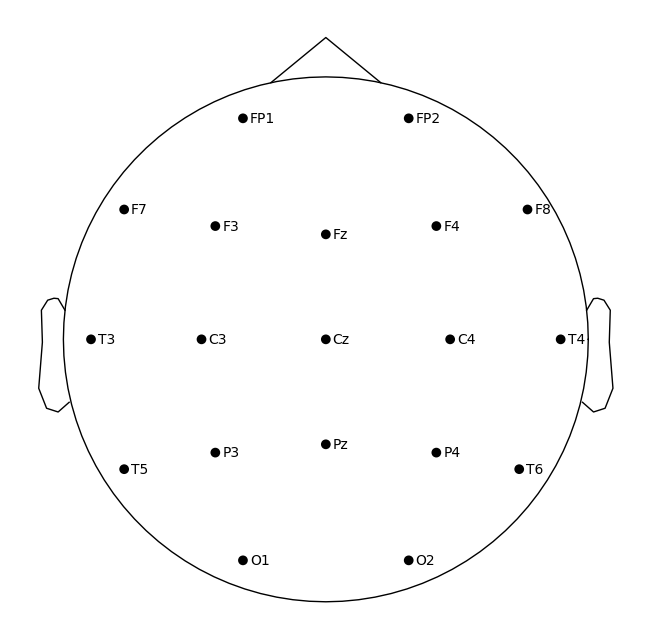

In [ ]:
mont = mne.channels.make_dig_montage(chs)
mont.plot()
plt.show()

In [ ]:
def plot_eeg(levels, positions, axes, fig, ch_names=None, cmap='Spectral_r', cb_pos=(0.9, 0.1),
             cb_width=0.04, cb_height=0.9, marker=None, marker_style=None, vmin=None, vmax=None, **kwargs):
    if 'mask' not in kwargs:
        mask = np.ones(levels.shape[0], dtype='bool')
    else:
        mask = None
    im, cm = mne.viz.plot_topomap(levels, positions, axes=axes, names=ch_names, vmin=vmin, vmax=vmax,
                          cmap=cmap, mask=mask, mask_params=marker_style, show=False, **kwargs)

    cbar_ax = fig.add_axes([cb_pos[0], cb_pos[1], cb_width, cb_height])
    clb = axes.figure.colorbar(im, cax=cbar_ax)
    return im, cm

In [ ]:
import pandas as pd


In [1]:
from google.colab import files
uploaded = files.upload()



Saving kaggle (4).json to kaggle (4).json


In [2]:
!mv "kaggle (4).json" kaggle.json

In [3]:
import os

# Eğer yanlış isimlendirilmişse, düzelt
if "kaggle (4).json" in os.listdir():
    os.rename("kaggle (4).json", "kaggle.json")

# Kaggle API anahtarını doğru konuma taşı
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Doğru izinleri ver


In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # API anahtarına doğru izinleri ver


mv: cannot stat 'kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d shashwatwork/eeg-psychiatric-disorders-dataset
!unzip eeg-psychiatric-disorders-dataset.zip



Dataset URL: https://www.kaggle.com/datasets/shashwatwork/eeg-psychiatric-disorders-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
Archive:  eeg-psychiatric-disorders-dataset.zip
  inflating: EEG.machinelearing_data_BRMH.csv  


In [6]:
import os

# Kaggle API anahtarı var mı kontrol et
if os.path.exists("/root/.kaggle/kaggle.json"):
    print("✅ Kaggle API anahtarı doğru yüklenmiş.")
else:
    print("❌ Kaggle API anahtarı bulunamadı. Yeniden yüklemeniz gerekiyor.")


✅ Kaggle API anahtarı doğru yüklenmiş.


In [7]:
import os

# Eğer yanlış isimlendirilmişse, düzelt
if "kaggle (4).json" in os.listdir():
    os.rename("kaggle (4).json", "kaggle.json")

# Kaggle API anahtarını doğru konuma taşı
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Doğru izinleri ver


mv: cannot stat 'kaggle.json': No such file or directory


In [8]:
!kaggle datasets download -d shashwatwork/eeg-psychiatric-disorders-dataset


Dataset URL: https://www.kaggle.com/datasets/shashwatwork/eeg-psychiatric-disorders-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
eeg-psychiatric-disorders-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!unzip -o eeg-psychiatric-disorders-dataset.zip -d eeg_data


Archive:  eeg-psychiatric-disorders-dataset.zip
  inflating: eeg_data/EEG.machinelearing_data_BRMH.csv  


In [10]:
import pandas as pd

df = pd.read_csv("eeg_data/EEG.machinelearing_data_BRMH.csv")  # Dosya adını buradan kontrol et
df.head()


,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [11]:
def plot_eeg(levels, positions, axes, fig, ch_names=None, cmap='Spectral_r', cb_pos=(0.9, 0.1),
             cb_width=0.04, cb_height=0.9, marker=None, marker_style=None, vmin=None, vmax=None, **kwargs):
    if 'mask' not in kwargs:
        mask = np.ones(levels.shape[0], dtype='bool')
    else:
        mask = None
    im, cm = mne.viz.plot_topomap(levels, positions, axes=axes, names=ch_names, vmin=vmin, vmax=vmax,
                          cmap=cmap, mask=mask, mask_params=marker_style, show=False, **kwargs)

    cbar_ax = fig.add_axes([cb_pos[0], cb_pos[1], cb_width, cb_height])
    clb = axes.figure.colorbar(im, cax=cbar_ax)
    return im, cm

In [12]:
import os

# Klasörde hangi dosyalar var?
print(os.listdir("eeg_data"))


['EEG.machinelearing_data_BRMH.csv']


In [13]:
import pandas as pd

# Doğru dosya yolu ile CSV dosyasını oku
df = pd.read_csv("eeg_data/EEG.machinelearing_data_BRMH.csv")

# İlk 5 satırı görüntüle
df.head()


,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [14]:
# One of the columns contains no data, it separates data
# patient info | abs power of PSD per band per channel | sep_col | functional connectivity data
mis = df.isna().sum()
sep_col = mis[mis == df.shape[0]].index[0]
df = df.loc[:, 'main.disorder':sep_col].drop(sep_col, axis=1)
df

,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,AB.F.gamma.j.Cz,AB.F.gamma.k.C4,AB.F.gamma.l.T4,AB.F.gamma.m.T5,AB.F.gamma.n.P3,AB.F.gamma.o.Pz,AB.F.gamma.p.P4,AB.F.gamma.q.T6,AB.F.gamma.r.O1,AB.F.gamma.s.O2
0,Addictive disorder,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,...,1.993727,1.765493,1.464281,1.501948,1.707307,1.553448,1.552658,1.388662,1.592717,1.806598
1,Addictive disorder,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,...,0.903383,0.931967,0.437117,0.930843,1.234874,1.373268,1.411808,1.140695,1.118041,3.162143
2,Addictive disorder,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,...,1.096713,1.691152,1.505663,1.133891,1.661768,1.403429,1.349457,1.270525,1.408471,1.454618
3,Addictive disorder,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,...,1.115040,1.122776,2.128138,1.648217,1.147666,1.049152,1.131654,1.415856,1.391048,1.527403
4,Addictive disorder,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,...,1.193191,2.320845,3.562820,1.441662,1.018804,1.274009,2.350806,2.307730,2.129431,3.766860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,Healthy control,Healthy control,41.851823,36.771496,43.671792,36.860889,24.732236,23.607823,23.288260,7.520642,...,1.966436,1.763397,1.285942,2.437923,2.130979,1.727413,1.710518,2.574734,2.533354,5.596057
941,Healthy control,Healthy control,18.986856,19.401387,27.586436,20.194732,19.407491,20.216570,16.465027,13.178851,...,2.701922,2.685138,2.648595,2.559590,3.054965,3.163359,3.247100,2.646515,3.385173,3.085049
942,Healthy control,Healthy control,28.781317,32.369230,11.717778,23.134370,26.209302,25.484497,22.586688,11.368466,...,3.258838,2.434620,1.501337,0.840513,1.733498,1.610465,1.644675,1.216763,1.614421,1.164097
943,Healthy control,Healthy control,19.929100,25.196375,14.445391,16.453456,16.590649,16.007279,18.909188,13.438102,...,1.849005,1.678465,3.655796,1.429330,3.151128,1.630643,1.888551,1.447402,1.819110,1.302056


In [16]:
import numpy as np

def reformat_name(name):
    band, _, channel = name[5:].split(sep='.')
    return f'{band}.{channel}'

reformat_vect = np.vectorize(reformat_name)
new_colnames = np.concatenate((df.columns[:2], reformat_vect(df.columns[2:])))
df = df.set_axis(new_colnames, axis=1)
print(df.columns)


Index(['main.disorder', 'specific.disorder', 'delta.FP1', 'delta.FP2',
       'delta.F7', 'delta.F3', 'delta.Fz', 'delta.F4', 'delta.F8', 'delta.T3',
       ...
       'gamma.Cz', 'gamma.C4', 'gamma.T4', 'gamma.T5', 'gamma.P3', 'gamma.Pz',
       'gamma.P4', 'gamma.T6', 'gamma.O1', 'gamma.O2'],
      dtype='object', length=116)


In [17]:
import pandas as pd

df = pd.read_csv("eeg_data/EEG.machinelearing_data_BRMH.csv")  # Dosya adını buradan kontrol et
df.head()


,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [18]:
# Gereksiz sütunları kaldırma
df = df.drop(columns=['no.', 'sex', 'eeg.date'])

# Eksik verileri kontrol etme
print(df.isnull().sum())

# Eksik verileri doldurma veya kaldırma
df = df.dropna()  # Eksik verileri içeren satırları kaldırma


age                       0
education                15
IQ                       13
main.disorder             0
specific.disorder         0
                         ..
COH.F.gamma.p.P4.r.O1     0
COH.F.gamma.p.P4.s.O2     0
COH.F.gamma.q.T6.r.O1     0
COH.F.gamma.q.T6.s.O2     0
COH.F.gamma.r.O1.s.O2     0
Length: 1146, dtype: int64


In [19]:
print(df[df['education'].isna() | df['IQ'].isna()])


Empty DataFrame
Columns: [age, education, IQ, main.disorder, specific.disorder, AB.A.delta.a.FP1, AB.A.delta.b.FP2, AB.A.delta.c.F7, AB.A.delta.d.F3, AB.A.delta.e.Fz, AB.A.delta.f.F4, AB.A.delta.g.F8, AB.A.delta.h.T3, AB.A.delta.i.C3, AB.A.delta.j.Cz, AB.A.delta.k.C4, AB.A.delta.l.T4, AB.A.delta.m.T5, AB.A.delta.n.P3, AB.A.delta.o.Pz, AB.A.delta.p.P4, AB.A.delta.q.T6, AB.A.delta.r.O1, AB.A.delta.s.O2, AB.B.theta.a.FP1, AB.B.theta.b.FP2, AB.B.theta.c.F7, AB.B.theta.d.F3, AB.B.theta.e.Fz, AB.B.theta.f.F4, AB.B.theta.g.F8, AB.B.theta.h.T3, AB.B.theta.i.C3, AB.B.theta.j.Cz, AB.B.theta.k.C4, AB.B.theta.l.T4, AB.B.theta.m.T5, AB.B.theta.n.P3, AB.B.theta.o.Pz, AB.B.theta.p.P4, AB.B.theta.q.T6, AB.B.theta.r.O1, AB.B.theta.s.O2, AB.C.alpha.a.FP1, AB.C.alpha.b.FP2, AB.C.alpha.c.F7, AB.C.alpha.d.F3, AB.C.alpha.e.Fz, AB.C.alpha.f.F4, AB.C.alpha.g.F8, AB.C.alpha.h.T3, AB.C.alpha.i.C3, AB.C.alpha.j.Cz, AB.C.alpha.k.C4, AB.C.alpha.l.T4, AB.C.alpha.m.T5, AB.C.alpha.n.P3, AB.C.alpha.o.Pz, AB.C.alpha.p.

In [20]:
df = pd.read_csv("eeg_data/EEG.machinelearing_data_BRMH.csv")  # Gerçek dosya adını yaz
print("Satır-Sütun sayısı:", df.shape)
print(df.head())  # İlk 5 satırı göster


Satır-Sütun sayısı: (945, 1149)
   no. sex   age    eeg.date  education     IQ       main.disorder  \
0    1   M  57.0   2012.8.30        NaN    NaN  Addictive disorder   
1    2   M  37.0    2012.9.6        6.0  120.0  Addictive disorder   
2    3   M  32.0   2012.9.10       16.0  113.0  Addictive disorder   
3    4   M  35.0   2012.10.8       18.0  126.0  Addictive disorder   
4    5   M  36.0  2012.10.18       16.0  112.0  Addictive disorder   

      specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  ...  \
0  Alcohol use disorder         35.998557         21.717375  ...   
1  Alcohol use disorder         13.425118         11.002916  ...   
2  Alcohol use disorder         29.941780         27.544684  ...   
3  Alcohol use disorder         21.496226         21.846832  ...   
4  Alcohol use disorder         37.775667         33.607679  ...   

   COH.F.gamma.o.Pz.p.P4  COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  \
0              55.989192              16.739679              23.

In [21]:
print("Eksik değer sayıları:\n", df.isna().sum().sort_values(ascending=False).head(20))


Eksik değer sayıları:
 Unnamed: 122            945
education                15
IQ                       13
COH.D.beta.j.Cz.s.O2      0
COH.D.beta.j.Cz.r.O1      0
COH.D.beta.j.Cz.q.T6      0
COH.D.beta.j.Cz.p.P4      0
COH.D.beta.j.Cz.o.Pz      0
COH.D.beta.j.Cz.n.P3      0
COH.D.beta.j.Cz.m.T5      0
COH.D.beta.j.Cz.l.T4      0
COH.D.beta.k.C4.l.T4      0
COH.D.beta.i.C3.s.O2      0
COH.D.beta.i.C3.r.O1      0
COH.D.beta.i.C3.q.T6      0
COH.D.beta.i.C3.p.P4      0
COH.D.beta.i.C3.o.Pz      0
COH.D.beta.i.C3.n.P3      0
COH.D.beta.i.C3.m.T5      0
COH.D.beta.j.Cz.k.C4      0
dtype: int64


In [22]:
df.loc[:, 'education'] = df['education'].fillna(df['education'].median())
df.loc[:, 'IQ'] = df['IQ'].fillna(df['IQ'].median())


In [23]:
print(df['main.disorder'].value_counts())
print(df['specific.disorder'].value_counts())


main.disorder
Mood disorder                         266
Addictive disorder                    186
Trauma and stress related disorder    128
Schizophrenia                         117
Anxiety disorder                      107
Healthy control                        95
Obsessive compulsive disorder          46
Name: count, dtype: int64
specific.disorder
Depressive disorder               199
Schizophrenia                     117
Healthy control                    95
Alcohol use disorder               93
Behavioral addiction disorder      93
Bipolar disorder                   67
Panic disorder                     59
Posttraumatic stress disorder      52
Social anxiety disorder            48
Obsessive compulsitve disorder     46
Acute stress disorder              38
Adjustment disorder                38
Name: count, dtype: int64


In [24]:
df[['age', 'IQ']].describe()


,age,IQ
count,945.000000,945.000000
mean,30.594804,101.586243
std,11.781592,16.904869
min,18.000000,49.000000
25%,21.730000,91.000000
50%,26.150000,102.000000
75%,35.450000,114.000000
max,71.880000,145.000000


In [ ]:
pip install seaborn


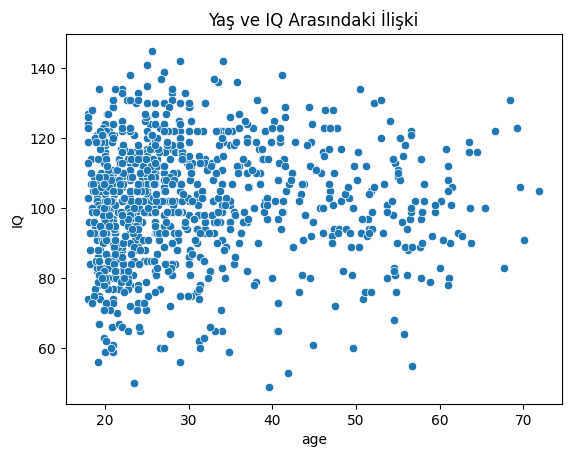

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='age', y='IQ', data=df)
plt.title("Yaş ve IQ Arasındaki İlişki")
plt.show()



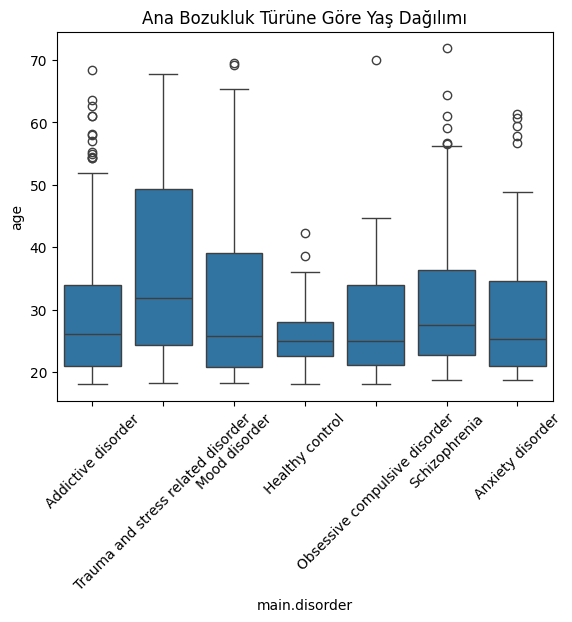

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='main.disorder', y='age', data=df)
plt.xticks(rotation=45)
plt.title("Ana Bozukluk Türüne Göre Yaş Dağılımı")
plt.show()


In [ ]:
df['sex'] = df['sex'].map({'M': 0, 'F': 1})


In [ ]:
df.drop(columns=['no.', 'eeg.date'], inplace=True)


In [ ]:
df['age'].fillna(df['age'].median(), inplace=True)
df['IQ'].fillna(df['IQ'].median(), inplace=True)


<ipython-input-41-c224bf9ae7b0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
<ipython-input-41-c224bf9ae7b0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['age'] >= Q1 - 1.5 * IQR) & (df['age'] <= Q3 + 1.5 * IQR)]


In [ ]:
print(df['specific.disorder'].value_counts())



specific.disorder
Depressive disorder               186
Schizophrenia                     110
Healthy control                    95
Behavioral addiction disorder      92
Alcohol use disorder               86
Bipolar disorder                   64
Panic disorder                     55
Social anxiety disorder            47
Obsessive compulsitve disorder     45
Posttraumatic stress disorder      43
Acute stress disorder              38
Adjustment disorder                34
Name: count, dtype: int64


In [ ]:
print(df.isnull().sum()[df.isnull().sum() > 0])  # Eksik verisi olan sütunları göster


Unnamed: 122    895
dtype: int64


In [ ]:
df.drop(columns=['Unnamed: 122'], inplace=True)


In [ ]:
print(df.isnull().sum().sum())  # 0 olmalı


0


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Özellikleri ve hedef değişkeni belirleme
X = df.drop(columns=['specific.disorder'])  # Bağımsız değişkenler
y = df['specific.disorder']  # Bağımlı değişken

# SMOTE uygulama
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Yeni dağılımı kontrol etme
print("SMOTE Sonrası Sınıf Dağılımı:", Counter(y_resampled))


SMOTE Sonrası Sınıf Dağılımı: Counter({2: 186, 0: 186, 5: 186, 6: 186, 3: 186, 7: 186, 10: 186, 8: 186, 11: 186, 9: 186, 1: 186, 4: 186})


In [ ]:
print(df.info())  # Tüm sütunlar beklediğin formatta mı?


<class 'pandas.core.frame.DataFrame'>
Index: 895 entries, 1 to 944
Columns: 1147 entries, sex to COH.F.gamma.r.O1.s.O2
dtypes: float64(1144), int64(1), object(2)
memory usage: 7.8+ MB
None


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Kategorik sütunları dönüştürme
df['main.disorder'] = le.fit_transform(df['main.disorder'])
df['specific.disorder'] = le.fit_transform(df['specific.disorder'])


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setinin genel bilgileri
print(df.info())

# Temel istatistikleri göster
print(df.describe())

# Eksik veri sayısı
print(df.isnull().sum().sort_values(ascending=False))


<class 'pandas.core.frame.DataFrame'>
Index: 895 entries, 1 to 944
Columns: 1146 entries, sex to COH.F.gamma.r.O1.s.O2
dtypes: float64(1143), int64(3)
memory usage: 7.8 MB
None
              sex         age   education          IQ  main.disorder  \
count  895.000000  895.000000  895.000000  895.000000     895.000000   
mean     0.362011   28.902022   13.602235  101.722905       2.750838   
std      0.480851    9.560395    2.299303   17.023187       1.998164   
min      0.000000   18.000000    0.000000   49.000000       0.000000   
25%      0.000000   21.365000   12.000000   91.000000       1.000000   
50%      0.000000   25.970000   13.000000  102.000000       3.000000   
75%      1.000000   33.560000   16.000000  114.000000       5.000000   
max      1.000000   55.880000   20.000000  145.000000       6.000000   

       specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
count         895.000000        895.000000        895.000000       895.000000   
mean        

<ipython-input-55-f363b2c81107>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y_resampled, order=y_resampled.value_counts().index, palette="viridis")


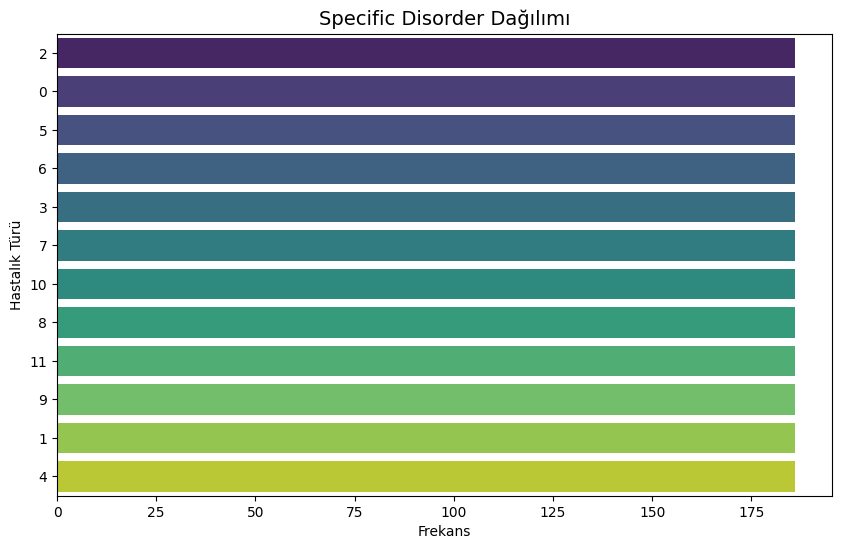

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y=y_resampled, order=y_resampled.value_counts().index, palette="viridis")
plt.title("Specific Disorder Dağılımı", fontsize=14)
plt.xlabel("Frekans")
plt.ylabel("Hastalık Türü")
plt.show()


<ipython-input-52-008024e9a7f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex", data=df, palette="coolwarm")


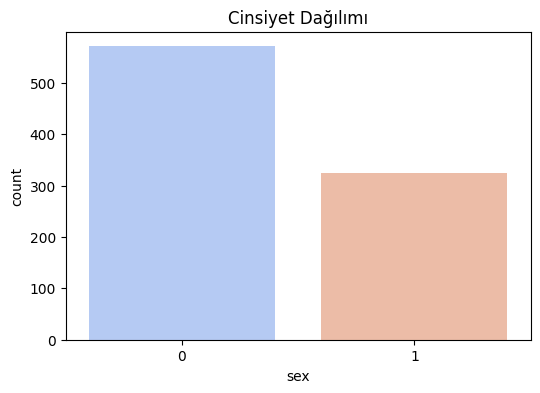

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="sex", data=df, palette="coolwarm")
plt.title("Cinsiyet Dağılımı")
plt.show()


<ipython-input-24-e3d09ea04f9f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="education", y="IQ", data=df, palette="Set3")


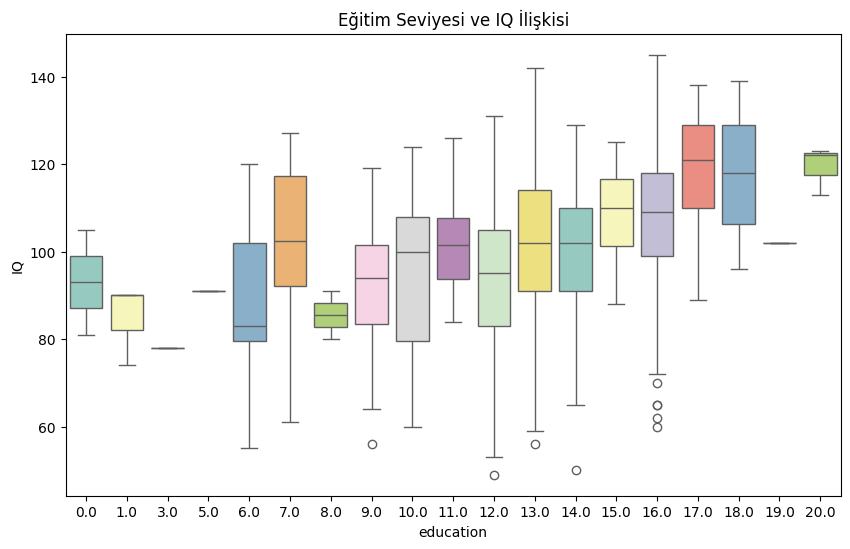

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="education", y="IQ", data=df, palette="Set3")
plt.title("Eğitim Seviyesi ve IQ İlişkisi")
plt.show()


<ipython-input-61-325ab4d77dfc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="specific.disorder", y="age", data=df, palette="magma")


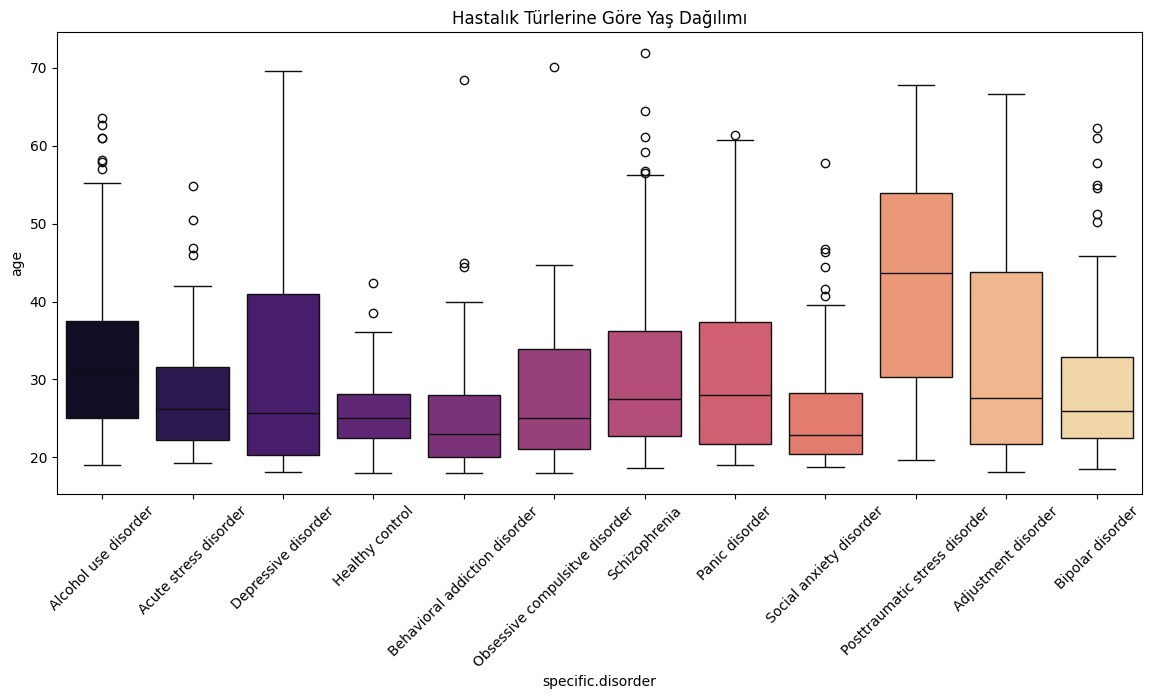

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="specific.disorder", y="age", data=df, palette="magma")
plt.xticks(rotation=45)
plt.title("Hastalık Türlerine Göre Yaş Dağılımı")
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("eeg_data/EEG.machinelearing_data_BRMH.csv")  # Dosya adını buradan kontrol et
df.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [ ]:
print(df[eeg_columns].isnull().sum())  # Eksik değerleri kontrol et
print((df[eeg_columns] == 0).sum())  # Sıfır olan değerleri say


no.                       0
age                       0
education                15
IQ                       13
AB.A.delta.a.FP1          0
                         ..
COH.F.gamma.p.P4.r.O1     0
COH.F.gamma.p.P4.s.O2     0
COH.F.gamma.q.T6.r.O1     0
COH.F.gamma.q.T6.s.O2     0
COH.F.gamma.r.O1.s.O2     0
Length: 1145, dtype: int64
no.                      0
age                      0
education                2
IQ                       0
AB.A.delta.a.FP1         0
                        ..
COH.F.gamma.p.P4.r.O1    0
COH.F.gamma.p.P4.s.O2    0
COH.F.gamma.q.T6.r.O1    0
COH.F.gamma.q.T6.s.O2    0
COH.F.gamma.r.O1.s.O2    0
Length: 1145, dtype: int64


<ipython-input-71-c725d9475f78>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=eeg_means.index, y=eeg_means.values, palette="viridis")


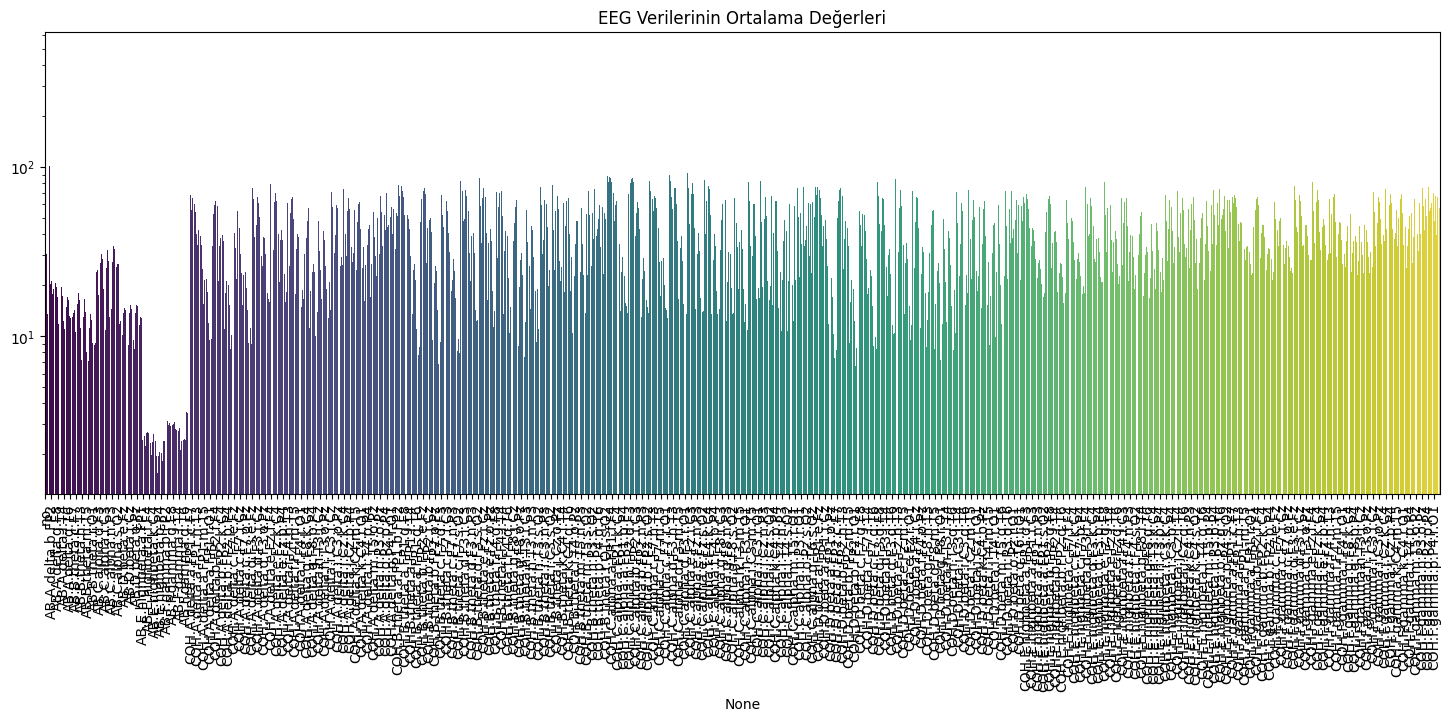

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EEG sütunlarını seç
eeg_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# EEG verilerinin ortalamasını hesapla
eeg_means = df[eeg_columns].mean()

# Ortalama değeri sıfır olmayan sütunları seç
eeg_means = eeg_means[eeg_means != 0]

# Grafiği çiz
plt.figure(figsize=(18, 6))  # Genişliği artır
sns.barplot(x=eeg_means.index, y=eeg_means.values, palette="viridis")

# X ekseni etiketlerini düzenle
plt.xticks(ticks=range(0, len(eeg_means), 5), labels=eeg_means.index[::5], rotation=90)

plt.title("EEG Verilerinin Ortalama Değerleri")
plt.yscale("log")  # Log ölçek kullanarak büyük değişiklikleri dengele
plt.show()






<ipython-input-72-640d48697d7a>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(healthy[eeg_feature], label="Sağlıklı", shade=True, color="green")
<ipython-input-72-640d48697d7a>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(disorders[eeg_feature], label="Hasta", shade=True, color="red")


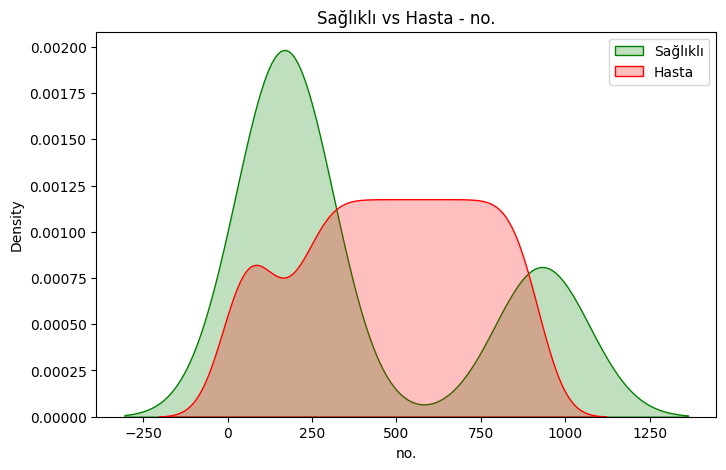

In [ ]:
# Sağlıklı ve hasta bireyleri ayırma
healthy = df[df["specific.disorder"] == "Healthy control"]
disorders = df[df["specific.disorder"] != "Healthy control"]

# Rastgele bir EEG değişkeni seçip karşılaştırma yapalım
eeg_feature = eeg_columns[0]

plt.figure(figsize=(8, 5))
sns.kdeplot(healthy[eeg_feature], label="Sağlıklı", shade=True, color="green")
sns.kdeplot(disorders[eeg_feature], label="Hasta", shade=True, color="red")
plt.title(f"Sağlıklı vs Hasta - {eeg_feature}")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd

print(df.isnull().sum())  # Her sütundaki NaN sayısını göster
print(df.isnull().sum().sum())  # Toplam NaN sayısını göster


no.                       0
sex                       0
age                       0
eeg.date                  0
education                15
                         ..
COH.F.gamma.p.P4.r.O1     0
COH.F.gamma.p.P4.s.O2     0
COH.F.gamma.q.T6.r.O1     0
COH.F.gamma.q.T6.s.O2     0
COH.F.gamma.r.O1.s.O2     0
Length: 1149, dtype: int64
973


In [ ]:
import numpy as np

# Her sütunda kaç tane eksik veri (NaN) var?
nan_counts = X.isna().sum()
print(nan_counts[nan_counts > 0])  # Sadece NaN içeren sütunları göster


Unnamed: 122    945
dtype: int64


In [ ]:
X = X.fillna(X.mean(numeric_only=True))  # Sadece sayısal sütunların ortalamasını al


In [ ]:
print("NaN kontrolü sonrası toplam eksik değer sayısı:", X.isna().sum().sum())


NaN kontrolü sonrası toplam eksik değer sayısı: 945


NaN kontrolü sonrası toplam eksik değer sayısı: 0


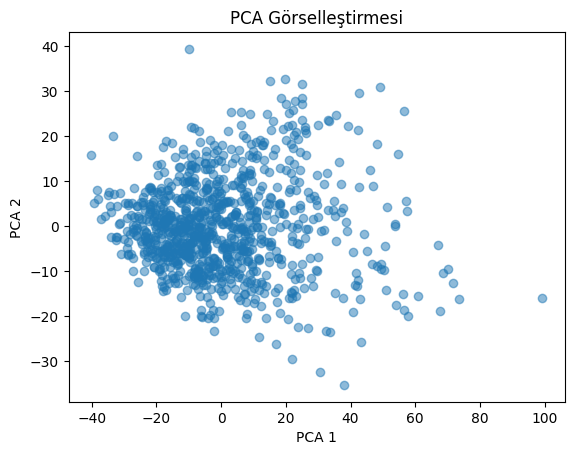

In [ ]:
# Gereksiz ve tamamen eksik sütunu kaldıralım
X = X.drop(columns=['Unnamed: 122'], errors='ignore')

# Tekrar NaN kontrolü yapalım
print("NaN kontrolü sonrası toplam eksik değer sayısı:", X.isna().sum().sum())

# Standardizasyon yap
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA uygula
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA Görselleştirme
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA Görselleştirmesi")
plt.show()





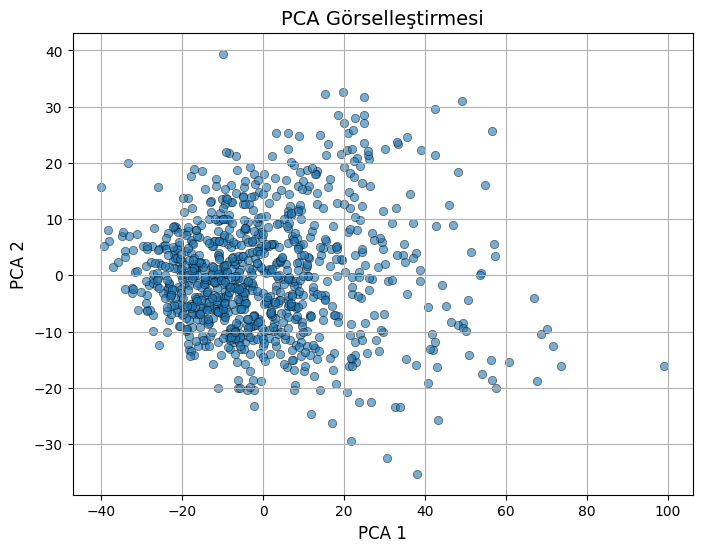

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))  # Grafik boyutunu büyüt
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.6, edgecolor="k")

plt.xlabel("PCA 1", fontsize=12)
plt.ylabel("PCA 2", fontsize=12)
plt.title("PCA Görselleştirmesi", fontsize=14)
plt.grid(True)  # Izgara ekleyerek daha okunaklı yap
plt.show()


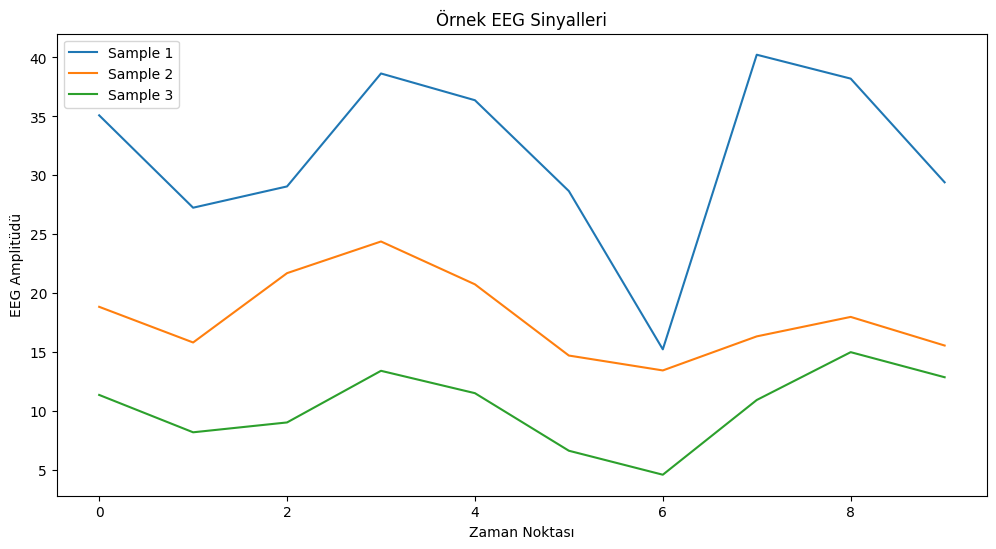

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Veriyi yükleme
df = pd.read_csv('/content/eeg_data/EEG.machinelearing_data_BRMH.csv')

# Sadece sayısal EEG sütunlarını seç
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Sayısal sütunları al

# EEG sütunlarını belirleme (ilk birkaç sayısal sütunu alalım)
eeg_columns = numeric_cols[5:15]  # Sayısal EEG verilerinin indeksini ayarlayabilirsin

# Rastgele 3 farklı kişiyi seç
random_samples = df.sample(n=3, random_state=42)

# EEG sinyallerini çizdir
plt.figure(figsize=(12, 6))
for i, row in enumerate(random_samples.iterrows()):
    plt.plot(row[1][eeg_columns].values, label=f'Sample {i+1}')

plt.xlabel('Zaman Noktası')
plt.ylabel('EEG Amplitüdü')
plt.title('Örnek EEG Sinyalleri')
plt.legend()
plt.show()


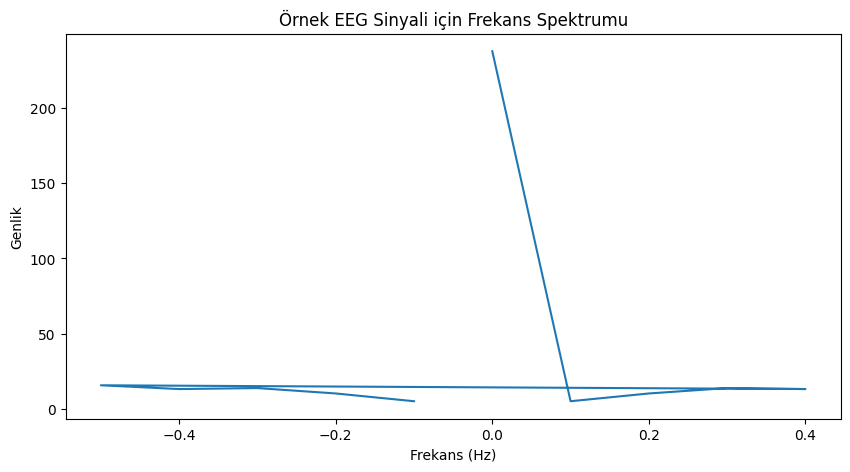

In [ ]:
import scipy.fftpack

# Rastgele bir örnek seçelim
sample_eeg = df[eeg_columns].iloc[0].values  # İlk satırdaki EEG verisi

# Fourier dönüşümünü hesaplayalım
fft_values = scipy.fftpack.fft(sample_eeg)
frequencies = scipy.fftpack.fftfreq(len(sample_eeg))

# Grafiği çizdirelim
plt.figure(figsize=(10, 5))
plt.plot(frequencies, abs(fft_values))  # Mutlak değer alarak genlikleri gösteriyoruz
plt.xlabel('Frekans (Hz)')
plt.ylabel('Genlik')
plt.title('Örnek EEG Sinyali için Frekans Spektrumu')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Sayısal olan EEG sütunlarını seçelim
eeg_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Sadece sayısal sütunlar

# Min-Max Normalizasyonu
scaler_minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax[eeg_columns] = scaler_minmax.fit_transform(df[eeg_columns])

# Z-score Standartlaştırma
scaler_zscore = StandardScaler()
df_zscore = df.copy()
df_zscore[eeg_columns] = scaler_zscore.fit_transform(df[eeg_columns])

# Özet gösterelim
print("Normalizasyon (Min-Max) Sonrası İlk 5 Satır:")
print(df_minmax[eeg_columns].head())

print("\nStandartlaştırma (Z-score) Sonrası İlk 5 Satır:")
print(df_zscore[eeg_columns].head())



/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Normalizasyon (Min-Max) Sonrası İlk 5 Satır:
        no.       age  education        IQ  AB.A.delta.a.FP1  \
0  0.000000  0.723831        NaN       NaN          0.365437   
1  0.001059  0.352635        0.3  0.739583          0.113371   
2  0.002119  0.259837        0.8  0.666667          0.297804   
3  0.003178  0.315516        0.9  0.802083          0.203497   
4  0.004237  0.334076        0.8  0.656250          0.385281   

   AB.A.delta.b.FP2  AB.A.delta.c.F7  AB.A.delta.d.F3  AB.A.delta.e.Fz  \
0          0.187981         0.209094         0.295867         0.223263   
1          0.078952         0.100676         0.149872         0.094145   
2          0.247279         0.159637         0.255225         0.228199   
3          0.189298         0.162062         0.131693         0.093620   
4          0.308975         0.213026         0.232003         0.184331   

   AB.A.delta.f.F4  ...  COH.F.gamma.o.Pz.p.P4  COH.F.gamma.o.Pz.q.T6  \
0         0.296434  ...               0.498207      

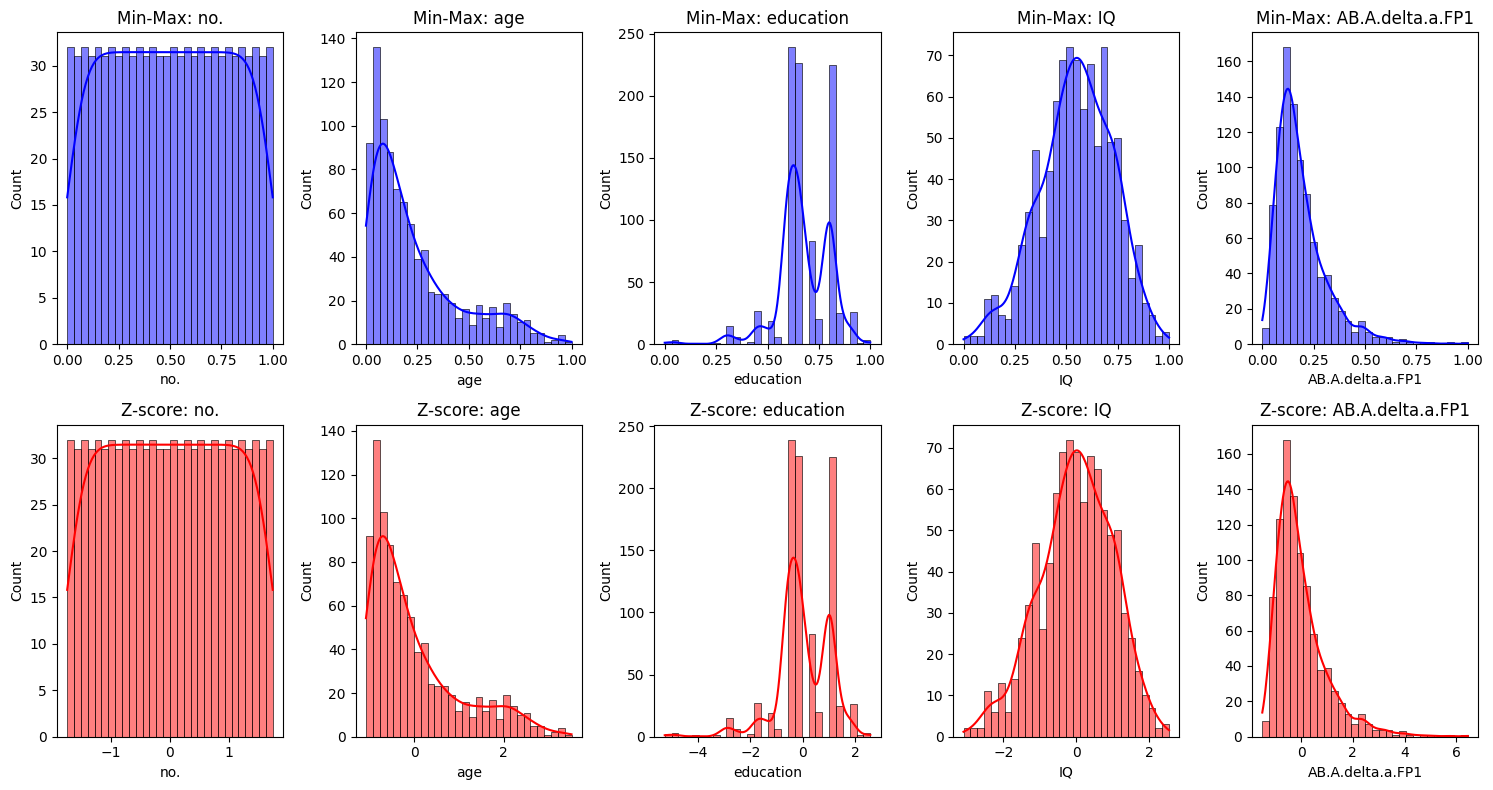

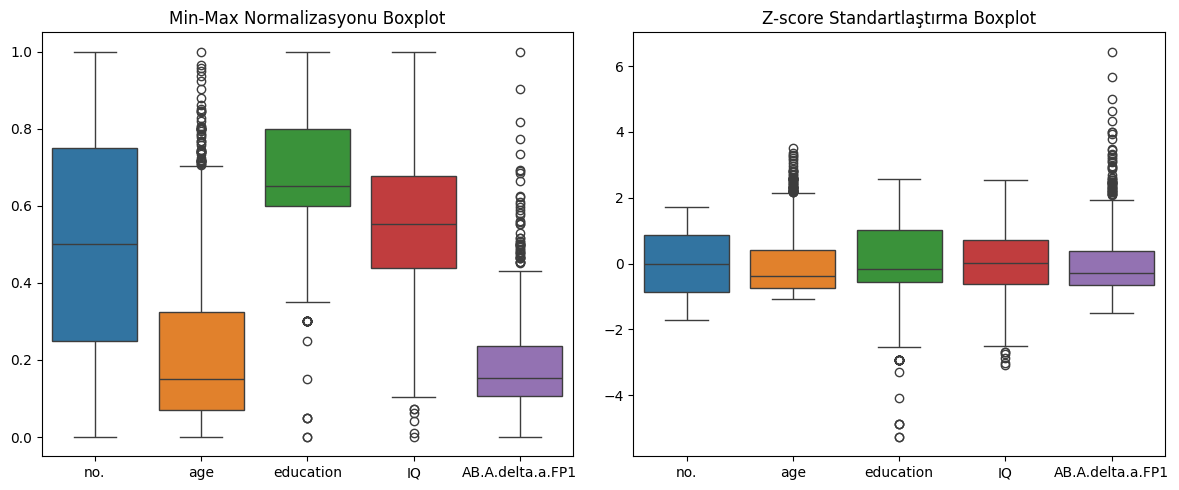

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# EEG verilerinden ilk birkaç sütunu seçelim (çok fazla sütun varsa aşırı kalabalık olmasın)
selected_columns = eeg_columns[:5]  # İlk 5 sütun için

fig, axes = plt.subplots(2, len(selected_columns), figsize=(15, 8))

for i, col in enumerate(selected_columns):
    # Min-Max Normalizasyonu Histogram
    sns.histplot(df_minmax[col], bins=30, kde=True, ax=axes[0, i], color='blue')
    axes[0, i].set_title(f"Min-Max: {col}")

    # Z-score Standartlaştırma Histogram
    sns.histplot(df_zscore[col], bins=30, kde=True, ax=axes[1, i], color='red')
    axes[1, i].set_title(f"Z-score: {col}")

plt.tight_layout()
plt.show()

# Boxplot çizimi
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Min-Max Boxplot
sns.boxplot(data=df_minmax[selected_columns], ax=axes[0])
axes[0].set_title("Min-Max Normalizasyonu Boxplot")

# Z-score Boxplot
sns.boxplot(data=df_zscore[selected_columns], ax=axes[1])
axes[1].set_title("Z-score Standartlaştırma Boxplot")

plt.tight_layout()
plt.show()


In [29]:
import os
import matplotlib.pyplot as plt

# EEG kolonlarını seçelim
eeg_columns = [col for col in df.columns if col.startswith('COH.') or col.startswith('EEG.')]

# Görsellerin kaydedileceği klasör
os.makedirs('eeg_images', exist_ok=True)

# İlk 100 veriyi görselleştirelim (test amaçlı, sonra genişletiriz)
for idx, row in df.iloc[:100].iterrows():
    plt.figure(figsize=(10, 4))
    plt.plot(row[eeg_columns].values.astype(float))  # string hatası almamak için float'a çevir
    plt.title(f"EEG Sample - {row['specific.disorder']}")
    plt.axis('off')
    plt.tight_layout()

    # Görseli kaydet
    disorder = str(row['specific.disorder']).replace(' ', '_').replace('/', '_')
    plt.savefig(f"eeg_images/{disorder}_{idx}.png")
    plt.close()


100 görsel bulundu. İlk 5 tanesi:


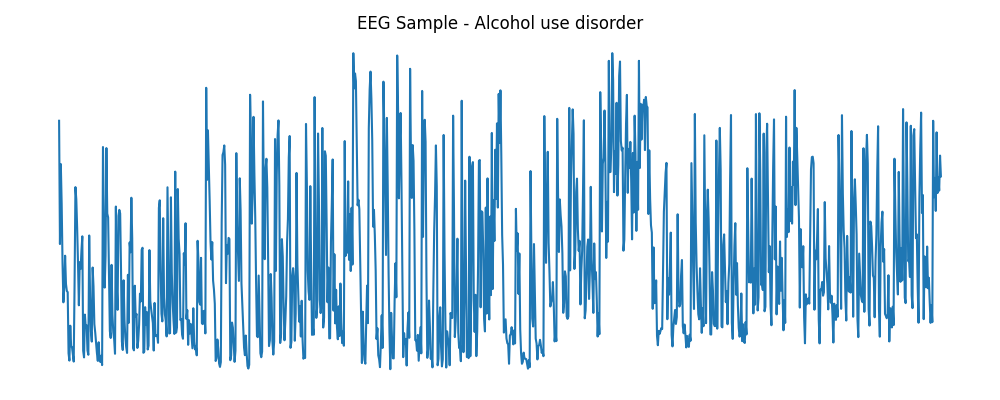

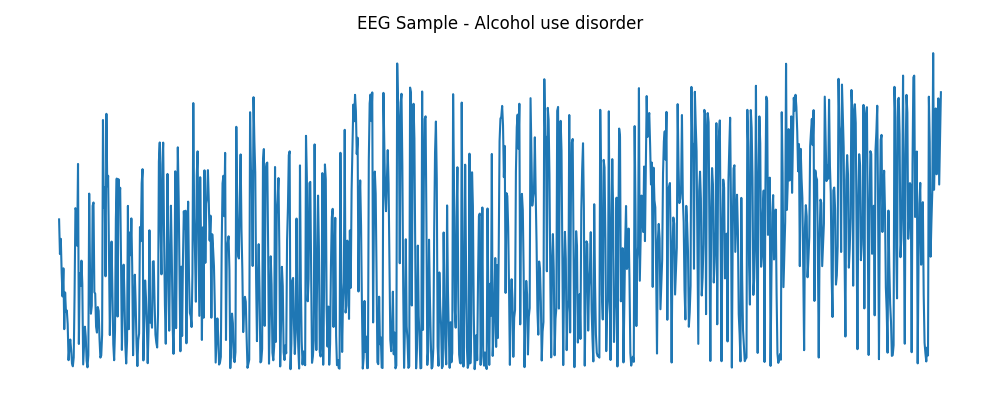

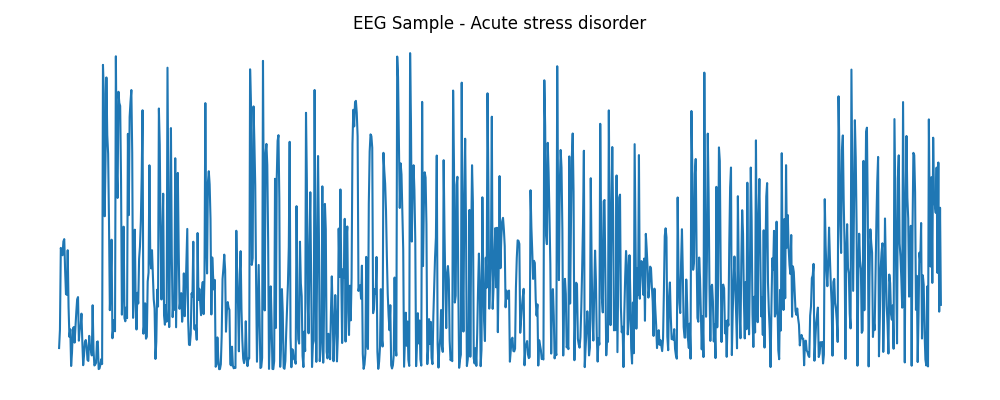

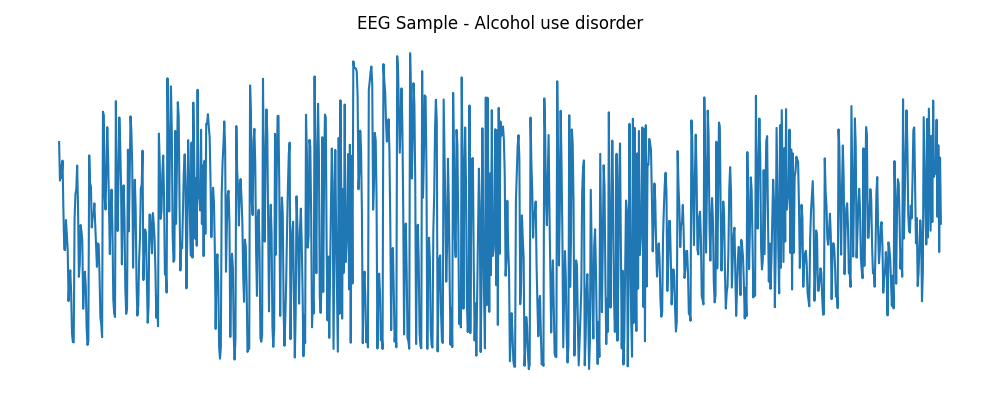

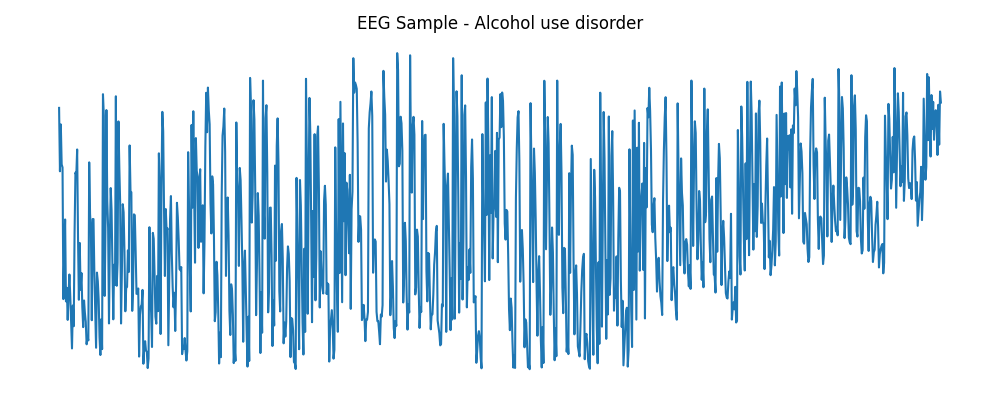

In [30]:
import os
from IPython.display import Image, display

# Dosyaları listeleyelim
image_files = os.listdir("eeg_images")
print(f"{len(image_files)} görsel bulundu. İlk 5 tanesi:")

# İlk 5 dosyayı göster
for img_name in image_files[:5]:
    display(Image(filename=f"eeg_images/{img_name}"))


In [31]:
import os
import pandas as pd

# Görsellerin bulunduğu klasör
image_dir = "/content/eeg_images"  # kendi yoluna göre güncelle

# Dosya yollarını ve etiketleri al
data = []
for filename in os.listdir(image_dir):
    if filename.endswith(".png"):
        label = filename.split("-")[-1].replace(".png", "").strip()
        path = os.path.join(image_dir, filename)
        data.append((path, label))

# DataFrame'e çevir
df_images = pd.DataFrame(data, columns=["filepath", "label"])
print(f"{len(df_images)} görsel bulundu.")
df_images.head()


100 görsel bulundu.


,filepath,label
0,/content/eeg_images/Alcohol_use_disorder_6.png,Alcohol_use_disorder_6
1,/content/eeg_images/Alcohol_use_disorder_86.png,Alcohol_use_disorder_86
2,/content/eeg_images/Acute_stress_disorder_43.png,Acute_stress_disorder_43
3,/content/eeg_images/Alcohol_use_disorder_87.png,Alcohol_use_disorder_87
4,/content/eeg_images/Alcohol_use_disorder_24.png,Alcohol_use_disorder_24


In [32]:
print(df_images['label'].value_counts())


label
Alcohol_use_disorder_6      1
Alcohol_use_disorder_86     1
Acute_stress_disorder_43    1
Alcohol_use_disorder_87     1
Alcohol_use_disorder_24     1
                           ..
Alcohol_use_disorder_62     1
Acute_stress_disorder_42    1
Alcohol_use_disorder_74     1
Alcohol_use_disorder_76     1
Acute_stress_disorder_52    1
Name: count, Length: 100, dtype: int64


In [33]:
# Label'ları genel sınıf ismine çevir
df_images['label'] = df_images['label'].apply(lambda x: '_'.join(x.split('_')[:-1]))

# Kaç örnek olduğunu tekrar görelim
print(df_images['label'].value_counts())


label
Alcohol_use_disorder     60
Acute_stress_disorder    29
Depressive_disorder      11
Name: count, dtype: int64


In [34]:
# Sadece bu üç sınıfı içeren örnekleri al
target_labels = ['Alcohol_use_disorder', 'Acute_stress_disorder', 'Depressive_disorder']
filtered_df = df_images[df_images['label'].isin(target_labels)]

# Boş değil mi kontrol edelim
print(f"Kalan veri sayısı: {len(filtered_df)}")
print(filtered_df['label'].value_counts())


Kalan veri sayısı: 100
label
Alcohol_use_disorder     60
Acute_stress_disorder    29
Depressive_disorder      11
Name: count, dtype: int64


In [35]:
from sklearn.model_selection import train_test_split

# Eğitim ve geçici (val + test)
train_df, temp_df = train_test_split(
    filtered_df, test_size=0.3, stratify=filtered_df['label'], random_state=42
)

# Doğrulama ve test
val_df, test_df = train_test_split(
    temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42
)

# Sonuçları görelim
print(f"Eğitim seti: {len(train_df)} örnek")
print(f"Doğrulama seti: {len(val_df)} örnek")
print(f"Test seti: {len(test_df)} örnek")




Eğitim seti: 70 örnek
Doğrulama seti: 15 örnek
Test seti: 15 örnek


In [36]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import torch

class EEGImageDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.data = dataframe.reset_index(drop=True)
        self.transform = transform
        self.labels = sorted(self.data['label'].unique())
        self.label_map = {label: idx for idx, label in enumerate(self.labels)}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = Image.open(self.data.iloc[idx]['image_path']).convert("RGB")
        label = self.label_map[self.data.iloc[idx]['label']]

        if self.transform:
            image = self.transform(image)

        return image, label


In [37]:
# Görsel boyutlandırma ve normalize işlemleri
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Dataset'leri oluştur
train_dataset = EEGImageDataset(train_df, transform=image_transforms)
val_dataset = EEGImageDataset(val_df, transform=image_transforms)
test_dataset = EEGImageDataset(test_df, transform=image_transforms)

# DataLoader'lar
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)


In [38]:
!pip install timm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [39]:
import timm
import torch.nn as nn

# Cihaz ayarı
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Modeli al
model = timm.create_model('vit_base_patch16_224', pretrained=True)

# Son katmanı sınıf sayısına göre değiştir
model.head = nn.Linear(model.head.in_features, len(train_dataset.labels))

model = model.to(device)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [40]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


In [41]:
def train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=5):
    for epoch in range(epochs):
        model.train()
        train_loss, correct, total = 0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        train_acc = correct / total * 100
        print(f"Epoch {epoch+1}/{epochs}, Loss: {train_loss:.4f}, Accuracy: {train_acc:.2f}%")


In [43]:
filtered_df.head()


,filepath,label
0,/content/eeg_images/Alcohol_use_disorder_6.png,Alcohol_use_disorder
1,/content/eeg_images/Alcohol_use_disorder_86.png,Alcohol_use_disorder
2,/content/eeg_images/Acute_stress_disorder_43.png,Acute_stress_disorder
3,/content/eeg_images/Alcohol_use_disorder_87.png,Alcohol_use_disorder
4,/content/eeg_images/Alcohol_use_disorder_24.png,Alcohol_use_disorder


In [45]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.


In [48]:
print(df.columns)


Index(['no.', 'sex', 'age', 'eeg.date', 'education', 'IQ', 'main.disorder',
       'specific.disorder', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       ...
       'COH.F.gamma.o.Pz.p.P4', 'COH.F.gamma.o.Pz.q.T6',
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2'],
      dtype='object', length=1149)


In [53]:
import os
import pandas as pd

# Görsellerin bulunduğu klasör
image_dir = '/content/eeg_images/'

# Görsel dosyalarını oku
filepaths = []
labels = []

for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
        filepaths.append(os.path.join(image_dir, filename))
        # Etiketi dosya adından al (örnek: 'Depressive_disorder_32.png')
        label = filename.rsplit('_', 1)[0]
        labels.append(label)

# DataFrame oluştur
df_images = pd.DataFrame({
    'filepath': filepaths,
    'label': labels
})

# Sonuç kontrolü
print(df_images.head())


                                           filepath                  label
0    /content/eeg_images/Alcohol_use_disorder_6.png   Alcohol_use_disorder
1   /content/eeg_images/Alcohol_use_disorder_86.png   Alcohol_use_disorder
2  /content/eeg_images/Acute_stress_disorder_43.png  Acute_stress_disorder
3   /content/eeg_images/Alcohol_use_disorder_87.png   Alcohol_use_disorder
4   /content/eeg_images/Alcohol_use_disorder_24.png   Alcohol_use_disorder


In [50]:
from sklearn.model_selection import train_test_split

# Eğitim %70, doğrulama %15, test %15
train_df, temp_df = train_test_split(df_images, test_size=0.3, stratify=df_images['label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

print(f"Eğitim seti: {len(train_df)} örnek")
print(f"Doğrulama seti: {len(val_df)} örnek")
print(f"Test seti: {len(test_df)} örnek")


Eğitim seti: 70 örnek
Doğrulama seti: 15 örnek
Test seti: 15 örnek


In [52]:
from transformers import ViTFeatureExtractor, ViTForImageClassification, Trainer, TrainingArguments
from torchvision import transforms
from PIL import Image
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset
import numpy as np

# 🔹 1. Veri Yükleme
df = pd.read_csv("eeg_data/EEG.machinelearing_data_BRMH.csv")  # veya varsa zaten yüklü olan dataframe
df = df.rename(columns={"filepath": "image_path"})  # sütun adını standardize ediyoruz

# 🔹 2. Label Encoding
label_encoder = LabelEncoder()
df["label_encoded"] = label_encoder.fit_transform(df["label"])
num_classes = len(label_encoder.classes_)

# 🔹 3. Görselleri Yükleyen Fonksiyon
def load_image(example):
    image = Image.open(example["image_path"]).convert("RGB")
    example["image"] = image
    return example

# 🔹 4. Dataset formatına çevir
dataset = Dataset.from_pandas(df[["image_path", "label_encoded"]])
dataset = dataset.map(load_image)

# 🔹 5. Eğitim / Doğrulama / Test böl
train_ds, temp_ds = dataset.train_test_split(test_size=0.3, stratify_by_column="label_encoded").values()
val_ds, test_ds = temp_ds.train_test_split(test_size=0.5, stratify_by_column="label_encoded").values()

# 🔹 6. Feature Extractor ve transform
extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224")

def transform(example):
    example["pixel_values"] = extractor(images=example["image"], return_tensors="pt")["pixel_values"][0]
    return example

train_ds = train_ds.map(transform)
val_ds = val_ds.map(transform)
test_ds = test_ds.map(transform)

# 🔹 7. Format ayarları (Torch tensor)
train_ds.set_format(type="torch", columns=["pixel_values", "label_encoded"])
val_ds.set_format(type="torch", columns=["pixel_values", "label_encoded"])
test_ds.set_format(type="torch", columns=["pixel_values", "label_encoded"])

# 🔹 8. Model oluştur
model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224",
    num_labels=num_classes
)

# 🔹 9. Eğitim ayarları
training_args = TrainingArguments(
    output_dir="./vit_eeg_model",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=5,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_total_limit=2
)

# 🔹 10. Metric fonksiyonu
import evaluate
metric = evaluate.load("accuracy")

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    return metric.compute(predictions=preds, references=p.label_ids)

# 🔹 11. Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    compute_metrics=compute_metrics,
)

# 🔹 12. Modeli eğit
trainer.train()

# 🔹 13. Test seti değerlendirme
eval_result = trainer.evaluate(test_ds)
print("Test Sonuçları:", eval_result)


KeyError: 'label'